# Move Classifier Dataset Exploration




## Code
### Imports

In [1]:
import os
import cv2
import json
import numpy as np
from IPython.display import Image 
import pandas as pd
from tqdm import tqdm
from random import randint

### Functions

In [2]:
def showSample(path, startFrame, numFrames):
    for i in range(startFrame, startFrame+numFrames):
        print(path + "/" + str(i) + ".jpg")
        try:
            display(Image(filename=path + "/" + str(i) + ".jpg"))
        except:
            print("Game Finished.")
            break

In [3]:
def gatherData(dataPathList):
    samples = []
    for dataPath in dataPathList:
        for folder in os.listdir(dataPath):
            samples.append(dataPath + folder)

    return samples

### Options

In [4]:
NUMFRAMES = 2
DATAPATHS = ["../assets/datasets/Move Classifier Data/MineRLBasaltFindCave-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltCreateVillageAnimalPen-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltMakeWaterfall-v0/"]

### Sample From Files

In [5]:
paths = gatherData(DATAPATHS)
path = paths[randint(0, len(paths))]
print("Sampled: ", path)
df = pd.read_csv(path + "/moves.csv")
df.head()

Sampled:  ../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586


,attack,back,forward,jump,left,right,sneak,sprint,use,drop,inventory,ESC,camera1,camera2,startImage,hotbar
0,0,0,0,0,1,0,0,0,0,0,0,0,10.000000,10.000000,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,-0.615394,1.609499,1,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,2,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.000000,3,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      14400 non-null  int64  
 1   back        14400 non-null  int64  
 2   forward     14400 non-null  int64  
 3   jump        14400 non-null  int64  
 4   left        14400 non-null  int64  
 5   right       14400 non-null  int64  
 6   sneak       14400 non-null  int64  
 7   sprint      14400 non-null  int64  
 8   use         14400 non-null  int64  
 9   drop        14400 non-null  int64  
 10  inventory   14400 non-null  int64  
 11  ESC         14400 non-null  int64  
 12  camera1     14400 non-null  float64
 13  camera2     14400 non-null  float64
 14  startImage  14400 non-null  int64  
 15  hotbar      14400 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.8 MB


In [7]:
df.describe()

,attack,back,forward,jump,left,right,sneak,sprint,use,drop,inventory,ESC,camera1,camera2,startImage,hotbar
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.0,14400.000000,14400.000000,14400.000000,14400.000000
mean,0.290208,0.083333,0.349514,0.210972,0.065000,0.114861,0.026319,0.126806,0.031736,0.000069,0.003889,0.0,-0.001866,-0.046099,7199.500000,3.314028
std,0.453874,0.276395,0.476833,0.408013,0.246534,0.318865,0.160089,0.332767,0.175303,0.008333,0.062242,0.0,2.152893,2.947503,4157.066273,1.741467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-10.000000,-10.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3599.750000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7199.500000,4.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10799.250000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,10.000000,10.000000,14399.000000,9.000000


### Show Sample of Moving Forward

attack            0.0
back              0.0
forward           1.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    10846.0
hotbar            3.0
Name: 10846, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/10846.jpg


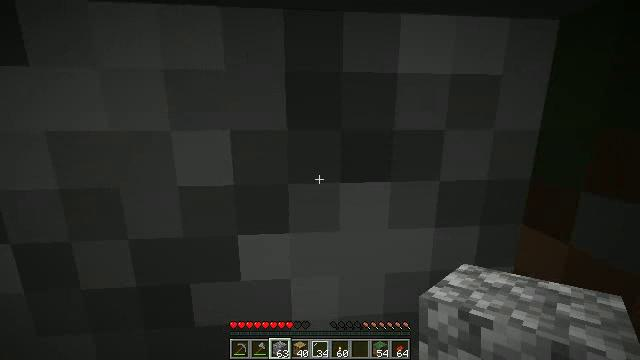

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/10847.jpg


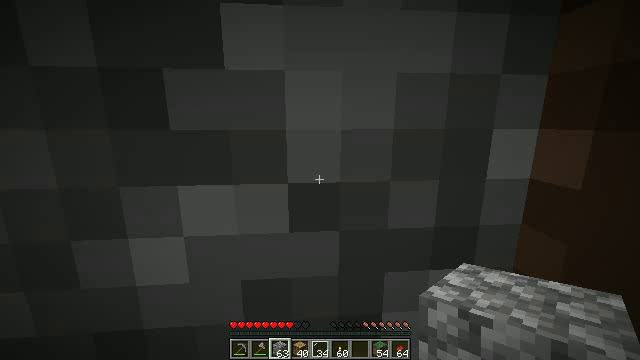

In [8]:
sample = df[df["forward"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Backward

attack            0.000000
back              1.000000
forward           0.000000
jump              0.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               0.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1           1.609499
camera2          -1.609499
startImage    11543.000000
hotbar            4.000000
Name: 11543, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/11543.jpg


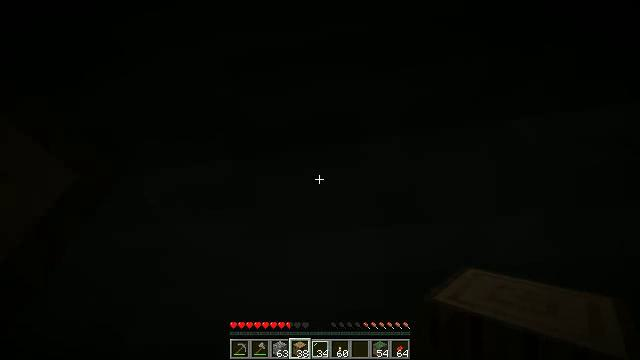

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/11544.jpg


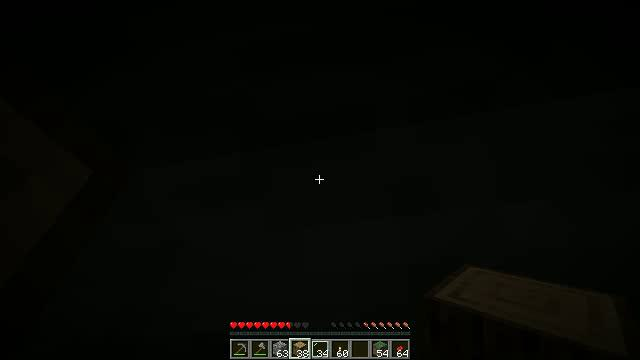

In [9]:
sample = df[df["back"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Left

attack          0.000000
back            0.000000
forward         1.000000
jump            0.000000
left            1.000000
right           0.000000
sneak           0.000000
sprint          1.000000
use             0.000000
drop            0.000000
inventory       0.000000
ESC             0.000000
camera1         0.000000
camera2         3.215369
startImage    843.000000
hotbar          1.000000
Name: 843, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/843.jpg


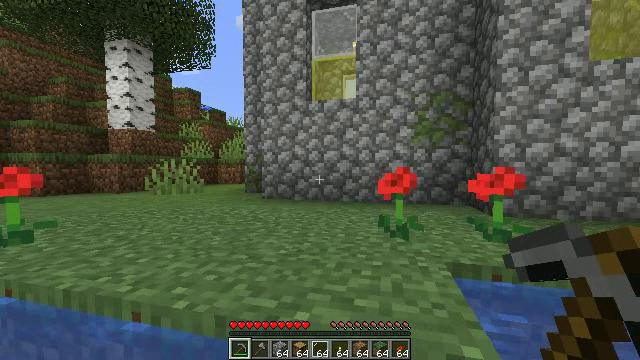

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/844.jpg


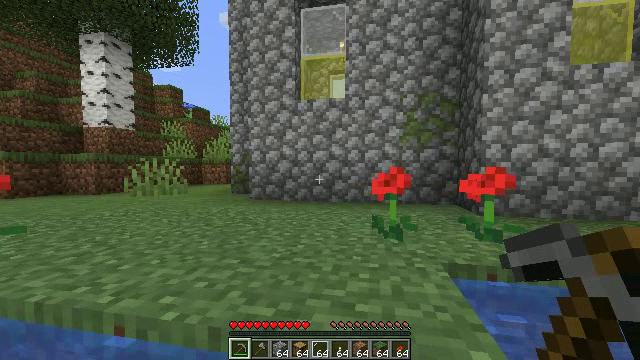

In [10]:
sample = df[df["left"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Right

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.000000
camera2         -5.809483
startImage    9347.000000
hotbar           4.000000
Name: 9347, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9347.jpg


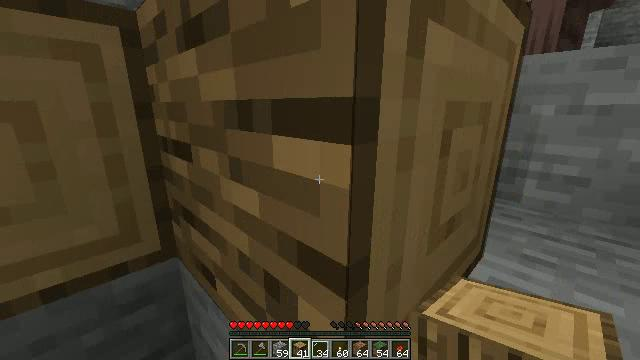

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9348.jpg


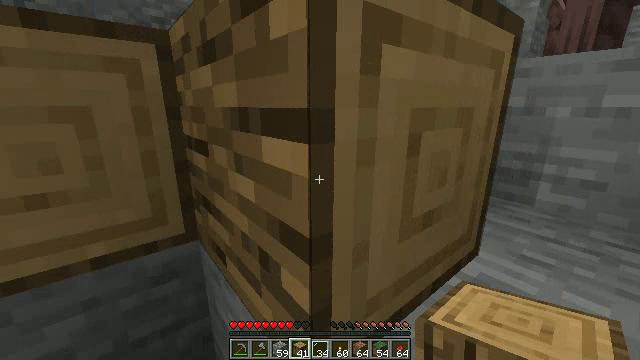

In [11]:
sample = df[df["right"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sneaking

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            1.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    8450.0
hotbar           5.0
Name: 8450, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/8450.jpg


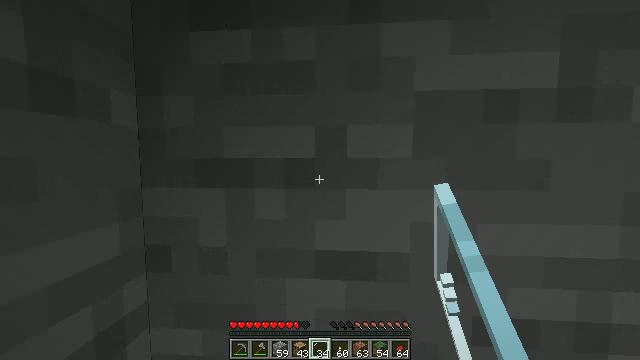

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/8451.jpg


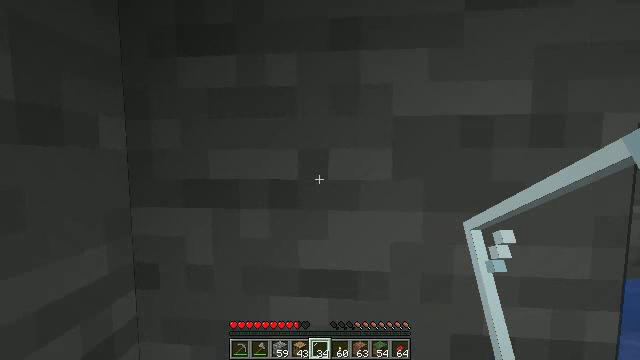

In [12]:
sample = df[df["sneak"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sprinting

attack           0.000000
back             1.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -0.615394
camera2          0.000000
startImage    9804.000000
hotbar           2.000000
Name: 9804, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9804.jpg


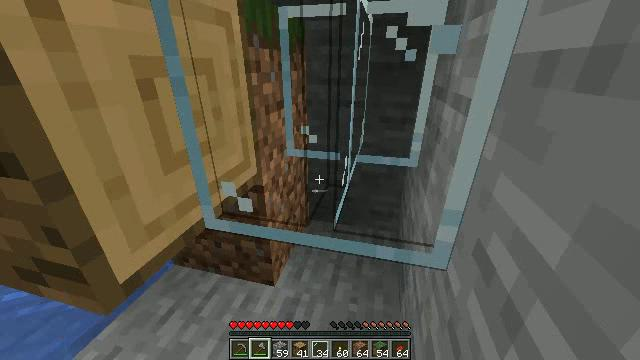

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9805.jpg


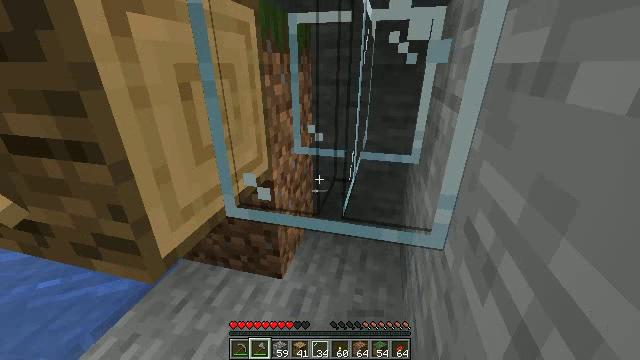

In [13]:
sample = df[df["sprint"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of an Left Click

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5677.0
hotbar           2.0
Name: 5677, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/5677.jpg


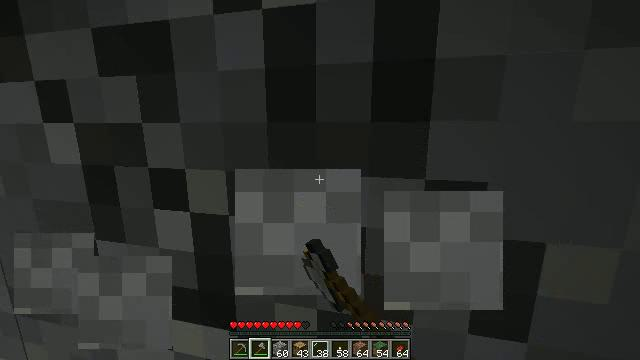

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/5678.jpg


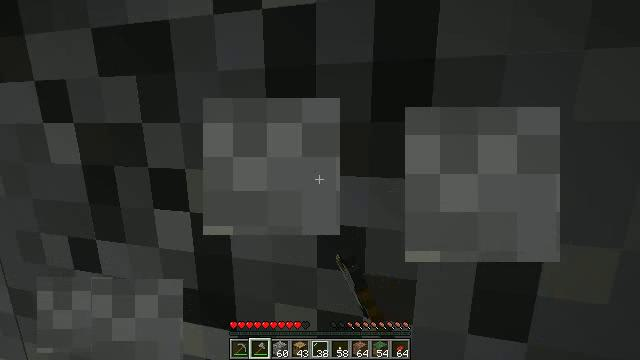

In [14]:
sample = df[df["attack"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Right Click

attack            0.000000
back              0.000000
forward           0.000000
jump              1.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               1.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1           0.615394
camera2           0.000000
startImage    12631.000000
hotbar            3.000000
Name: 12631, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12631.jpg


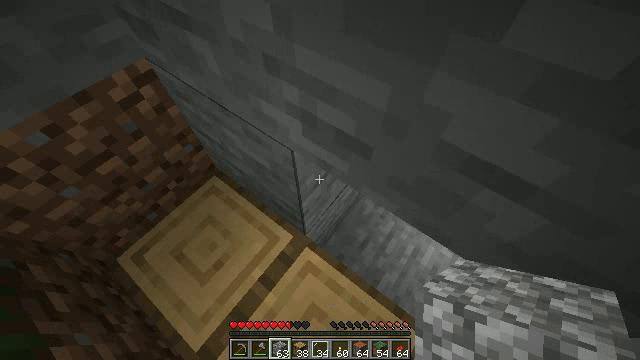

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12632.jpg


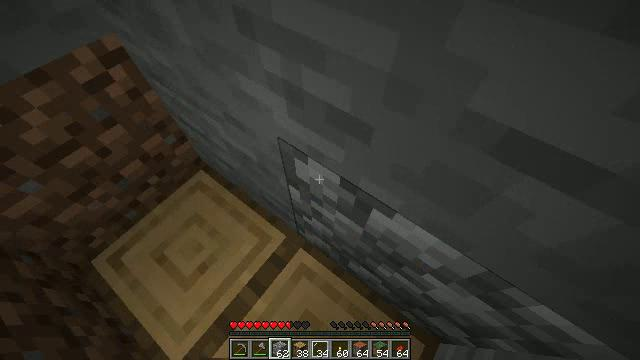

In [15]:
sample = df[df["use"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Dropping Item

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             1.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    7359.0
hotbar           5.0
Name: 7359, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/7359.jpg


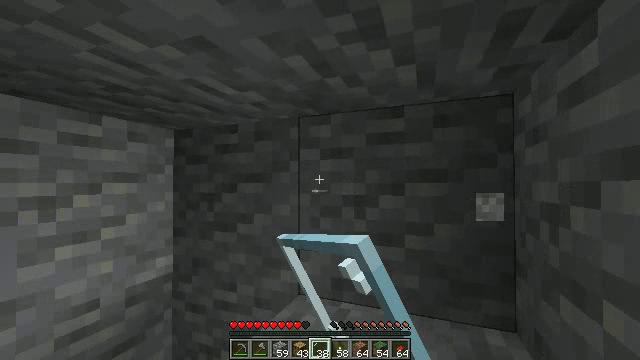

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/7360.jpg


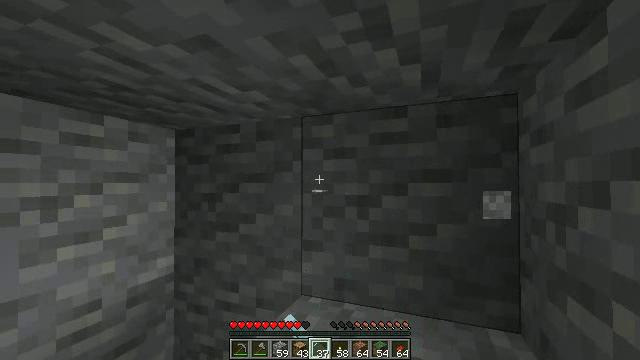

In [16]:
sample = df[df["drop"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Open Inventory

attack            0.000000
back              0.000000
forward           0.000000
jump              0.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               0.000000
drop              0.000000
inventory         1.000000
ESC               0.000000
camera1           0.000000
camera2           1.609499
startImage    14020.000000
hotbar            1.000000
Name: 14020, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/14020.jpg


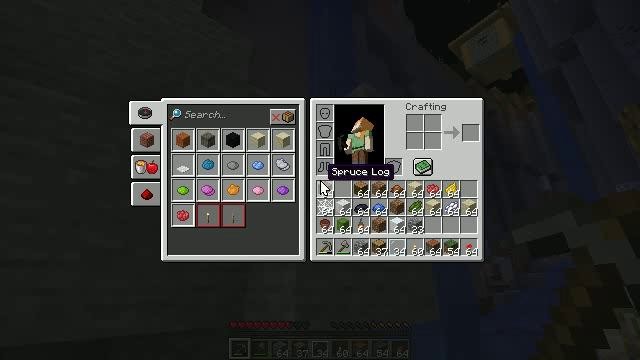

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/14021.jpg


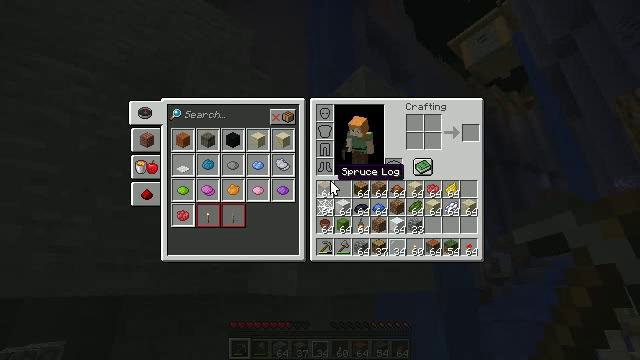

In [17]:
sample = df[df["inventory"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 1

attack          0.000000
back            0.000000
forward         1.000000
jump            0.000000
left            1.000000
right           0.000000
sneak           0.000000
sprint          1.000000
use             0.000000
drop            0.000000
inventory       0.000000
ESC             0.000000
camera1         0.615394
camera2         0.000000
startImage    870.000000
hotbar          1.000000
Name: 870, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/870.jpg


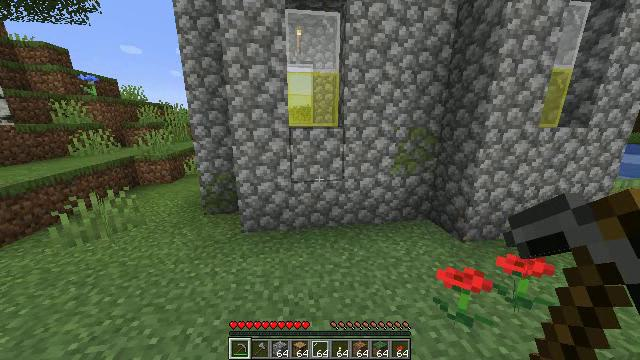

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/871.jpg


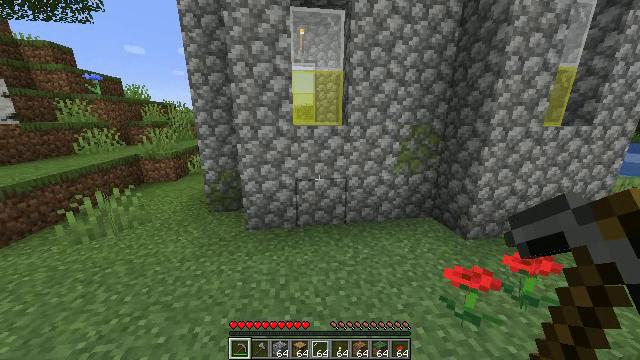

In [18]:
sample = df[df["hotbar"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 2

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5912.0
hotbar           2.0
Name: 5912, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/5912.jpg


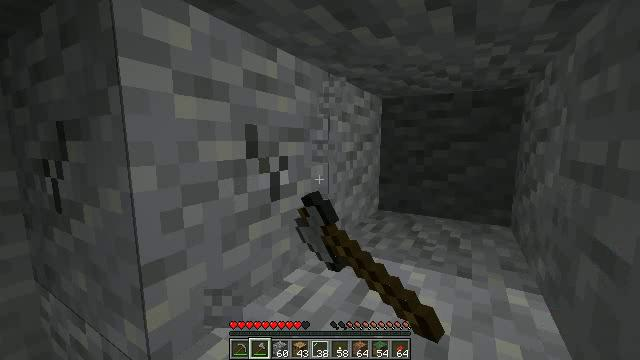

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/5913.jpg


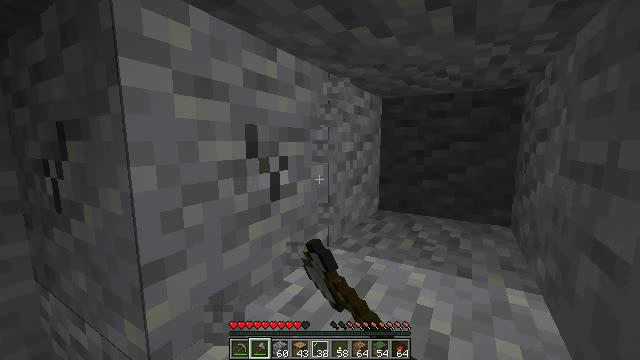

In [19]:
sample = df[df["hotbar"]==2].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 3

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    6925.0
hotbar           3.0
Name: 6925, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/6925.jpg


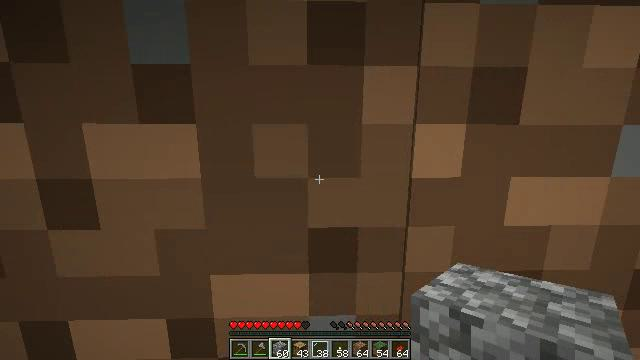

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/6926.jpg


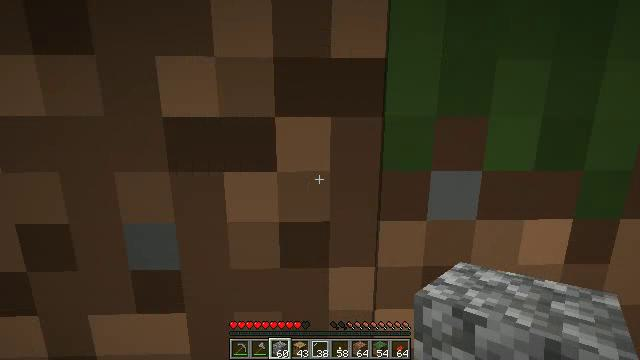

In [20]:
sample = df[df["hotbar"]==3].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 4

attack           0.0
back             0.0
forward          1.0
jump             1.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    2625.0
hotbar           4.0
Name: 2625, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/2625.jpg


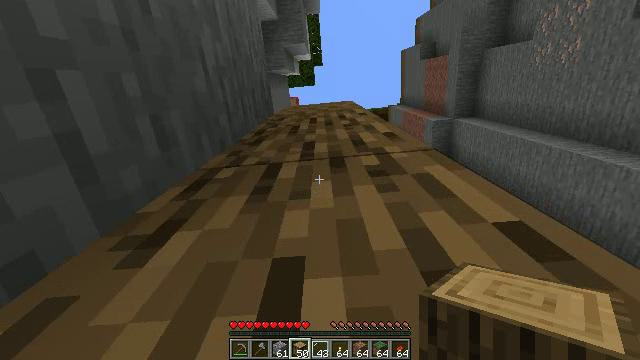

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/2626.jpg


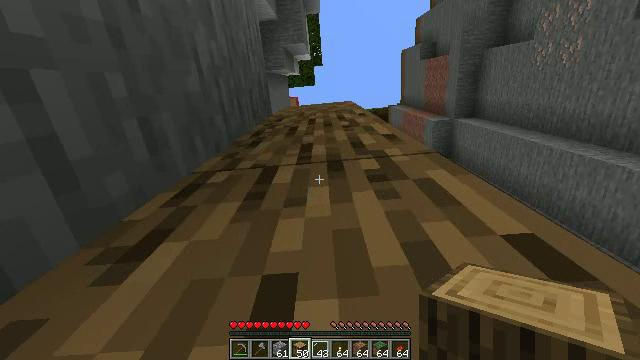

In [21]:
sample = df[df["hotbar"]==4].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 5

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          3.215369
camera2          0.000000
startImage    9579.000000
hotbar           5.000000
Name: 9579, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9579.jpg


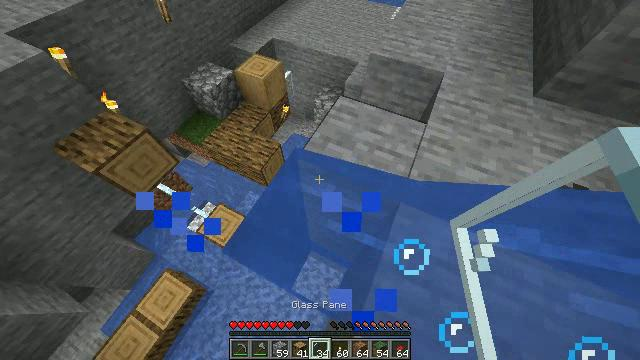

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/9580.jpg


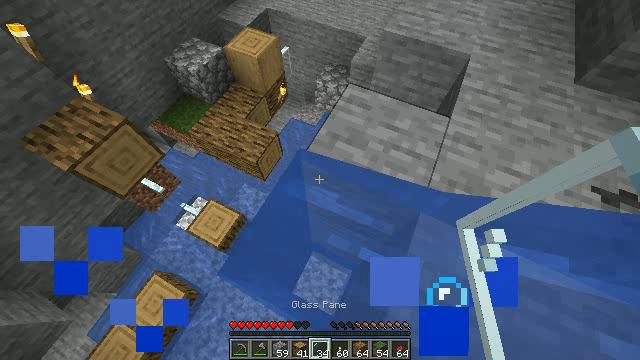

In [22]:
sample = df[df["hotbar"]==5].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 6

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            1.0
sneak            0.0
sprint           1.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    3704.0
hotbar           6.0
Name: 3704, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/3704.jpg


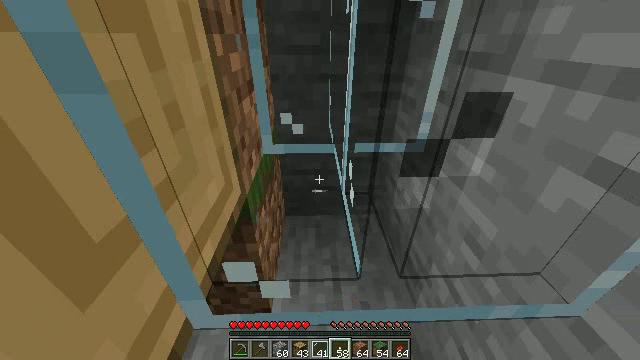

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/3705.jpg


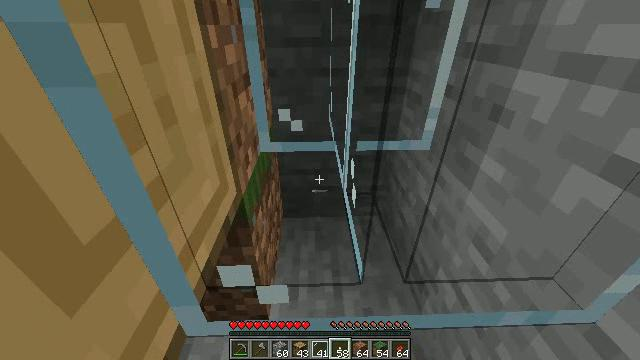

In [23]:
sample = df[df["hotbar"]==6].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)
    

### Show Sample of Changing Hotbar to 7

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.000000
camera2          5.809483
startImage    7571.000000
hotbar           7.000000
Name: 7571, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/7571.jpg


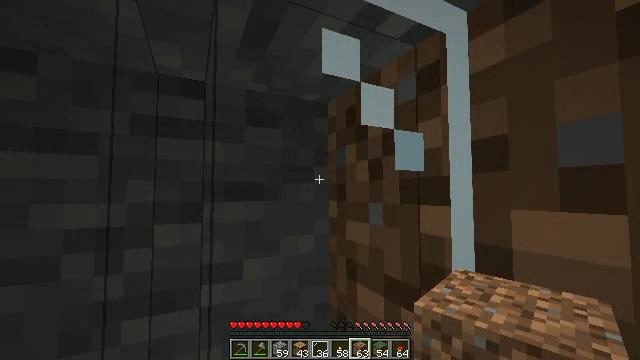

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/7572.jpg


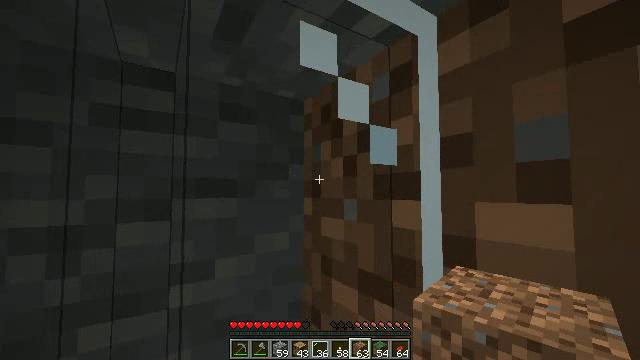

In [24]:
sample = df[df["hotbar"]==7].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 8

attack            0.0
back              0.0
forward           1.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    12812.0
hotbar            8.0
Name: 12812, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12812.jpg


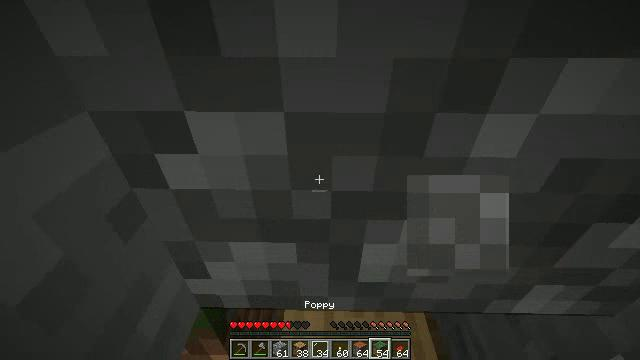

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12813.jpg


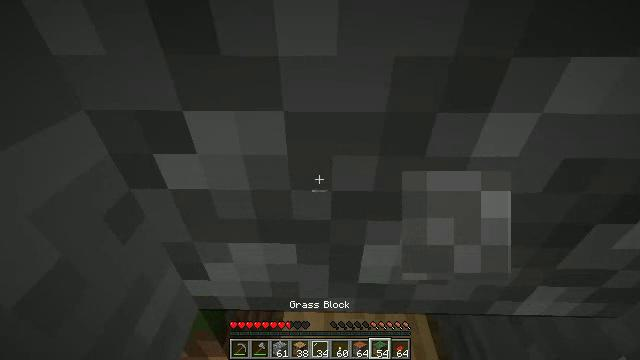

In [25]:
sample = df[df["hotbar"]==8].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 9

attack            0.000000
back              0.000000
forward           0.000000
jump              0.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               1.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1         -10.000000
camera2           3.215369
startImage    12959.000000
hotbar            9.000000
Name: 12959, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12959.jpg


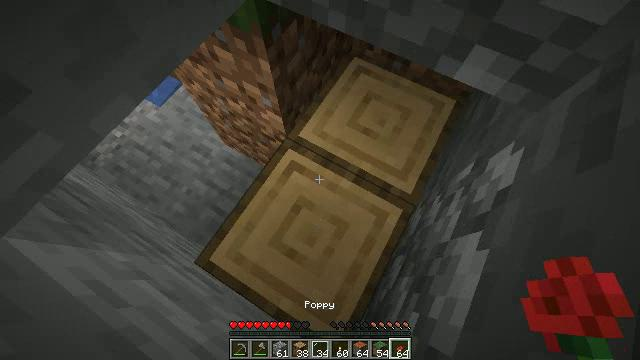

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/12960.jpg


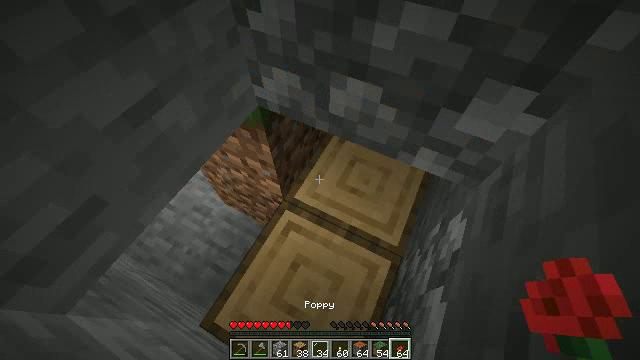

In [26]:
sample = df[df["hotbar"]==9].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (Y-Axis)

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -0.615394
camera2         -5.809483
startImage    8021.000000
hotbar           6.000000
Name: 8021, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/8021.jpg


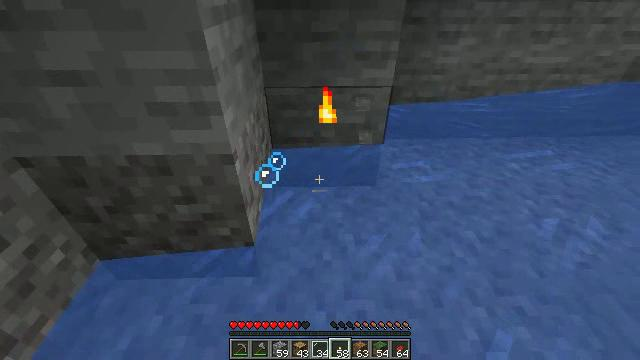

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/8022.jpg


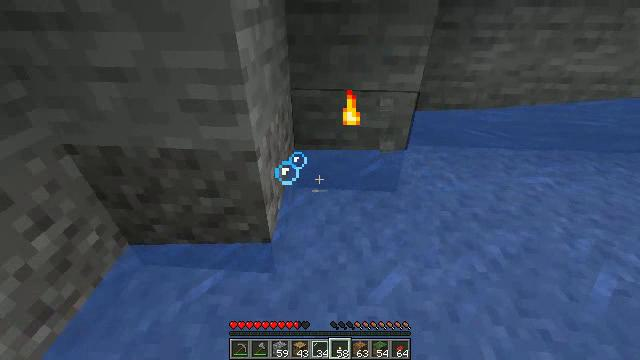

In [27]:
sample = df[df["camera1"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (X-Axis)

attack            0.000000
back              0.000000
forward           0.000000
jump              0.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               0.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1           0.615394
camera2           0.615394
startImage    11016.000000
hotbar            4.000000
Name: 11016, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/11016.jpg


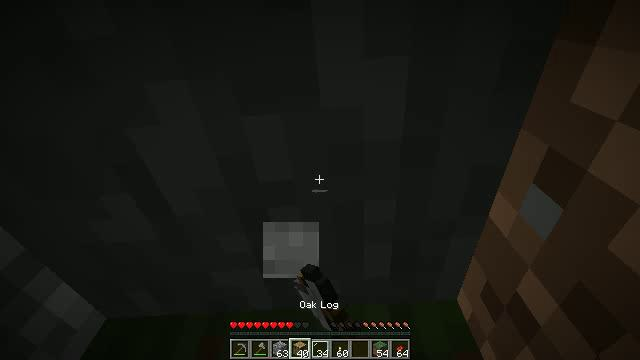

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/11017.jpg


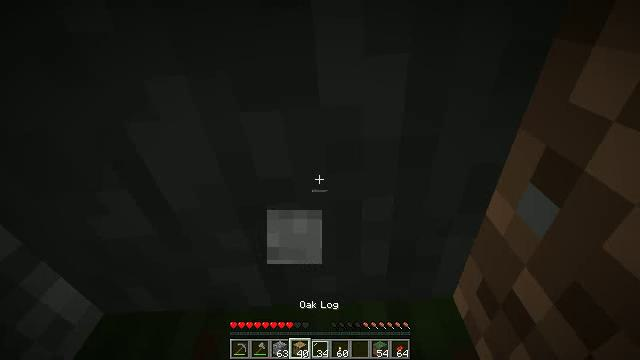

In [28]:
sample = df[df["camera2"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)